# Data Sorting and Ranking Techniques

# 1. Basic Sorting Examples

In [1]:
import pandas as pd
import numpy as np

# Create sample dataset
data = {
    'employee_id': [101, 102, 103, 104, 105, 106, 107, 108],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'],
    'department': ['IT', 'HR', 'Finance', 'IT', 'Marketing', 'Finance', 'HR', 'IT'],
    'salary': [75000, 85000, 65000, 78000, 60000, 90000, 62000, 82000],
    'experience': [3, 7, 2, 4, 1, 8, 2, 5],
    'bonus': [5000, 8000, 3000, 6000, 2000, 9000, 3500, 7000],
    'rating': [4.2, 4.5, 3.8, 4.0, 3.5, 4.8, 3.9, 4.1]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\n" + "="*80)

Original DataFrame:
   employee_id     name department  salary  experience  bonus  rating
0          101    Alice         IT   75000           3   5000     4.2
1          102      Bob         HR   85000           7   8000     4.5
2          103  Charlie    Finance   65000           2   3000     3.8
3          104    David         IT   78000           4   6000     4.0
4          105      Eva  Marketing   60000           1   2000     3.5
5          106    Frank    Finance   90000           8   9000     4.8
6          107    Grace         HR   62000           2   3500     3.9
7          108    Henry         IT   82000           5   7000     4.1



## Example 1.1: Single Column Sorting

In [2]:
# Sort by salary (ascending - default)
sorted_by_salary_asc = df.sort_values('salary')
print("1. Sorted by Salary (Ascending):")
print(sorted_by_salary_asc[['name', 'salary', 'department']])

# Sort by salary (descending)
sorted_by_salary_desc = df.sort_values('salary', ascending=False)
print("\n2. Sorted by Salary (Descending):")
print(sorted_by_salary_desc[['name', 'salary', 'department']])

# Sort by name alphabetically
sorted_by_name = df.sort_values('name')
print("\n3. Sorted by Name (Alphabetical):")
print(sorted_by_name[['name', 'department', 'salary']])

1. Sorted by Salary (Ascending):
      name  salary department
4      Eva   60000  Marketing
6    Grace   62000         HR
2  Charlie   65000    Finance
0    Alice   75000         IT
3    David   78000         IT
7    Henry   82000         IT
1      Bob   85000         HR
5    Frank   90000    Finance

2. Sorted by Salary (Descending):
      name  salary department
5    Frank   90000    Finance
1      Bob   85000         HR
7    Henry   82000         IT
3    David   78000         IT
0    Alice   75000         IT
2  Charlie   65000    Finance
6    Grace   62000         HR
4      Eva   60000  Marketing

3. Sorted by Name (Alphabetical):
      name department  salary
0    Alice         IT   75000
1      Bob         HR   85000
2  Charlie    Finance   65000
3    David         IT   78000
4      Eva  Marketing   60000
5    Frank    Finance   90000
6    Grace         HR   62000
7    Henry         IT   82000


# Example 1.2: Multiple Column Sorting

In [3]:
# Sort by department then by salary (ascending for both)
sorted_dept_salary = df.sort_values(['department', 'salary'])
print("1. Sort by Department (A-Z) then Salary (Low-High):")
print(sorted_dept_salary[['name', 'department', 'salary']])

# Sort by department (A-Z) then salary (High-Low)
sorted_dept_salary_desc = df.sort_values(['department', 'salary'], ascending=[True, False])
print("\n2. Sort by Department (A-Z) then Salary (High-Low):")
print(sorted_dept_salary_desc[['name', 'department', 'salary']])

# Sort by rating (High-Low) then experience (High-Low)
sorted_rating_exp = df.sort_values(['rating', 'experience'], ascending=[False, False])
print("\n3. Sort by Rating (High-Low) then Experience (High-Low):")
print(sorted_rating_exp[['name', 'rating', 'experience', 'department']])

1. Sort by Department (A-Z) then Salary (Low-High):
      name department  salary
2  Charlie    Finance   65000
5    Frank    Finance   90000
6    Grace         HR   62000
1      Bob         HR   85000
0    Alice         IT   75000
3    David         IT   78000
7    Henry         IT   82000
4      Eva  Marketing   60000

2. Sort by Department (A-Z) then Salary (High-Low):
      name department  salary
5    Frank    Finance   90000
2  Charlie    Finance   65000
1      Bob         HR   85000
6    Grace         HR   62000
7    Henry         IT   82000
3    David         IT   78000
0    Alice         IT   75000
4      Eva  Marketing   60000

3. Sort by Rating (High-Low) then Experience (High-Low):
      name  rating  experience department
5    Frank     4.8           8    Finance
1      Bob     4.5           7         HR
0    Alice     4.2           3         IT
7    Henry     4.1           5         IT
3    David     4.0           4         IT
6    Grace     3.9           2         HR
2  

# Example 1.3: Sorting with Custom Functions

In [4]:
# Sort by name length
df['name_length'] = df['name'].apply(len)
sorted_by_length = df.sort_values('name_length', ascending=False)
print("1. Sorted by Name Length (Longest first):")
print(sorted_by_length[['name', 'name_length', 'department']])

# Sort by last character of name
df['last_char'] = df['name'].str[-1]
sorted_by_last_char = df.sort_values('last_char')
print("\n2. Sorted by Last Character of Name:")
print(sorted_by_last_char[['name', 'last_char', 'department']])

1. Sorted by Name Length (Longest first):
      name  name_length department
2  Charlie            7    Finance
0    Alice            5         IT
3    David            5         IT
5    Frank            5    Finance
7    Henry            5         IT
6    Grace            5         HR
1      Bob            3         HR
4      Eva            3  Marketing

2. Sorted by Last Character of Name:
      name last_char department
4      Eva         a  Marketing
1      Bob         b         HR
3    David         d         IT
0    Alice         e         IT
2  Charlie         e    Finance
6    Grace         e         HR
5    Frank         k    Finance
7    Henry         y         IT


# 2. Ranking Techniques

## Example 2.1: Basic Ranking Methods

In [5]:
print("RANKING METHODS COMPARISON:")

# Method 1: Standard competition ranking (1224)
df['rank_dense'] = df['salary'].rank(method='dense')
print("1. Dense Ranking (no gaps, same rank for ties):")
print(df[['name', 'salary', 'rank_dense']].sort_values('rank_dense'))

# Method 2: Ordinal ranking (1234)
df['rank_min'] = df['salary'].rank(method='min')
print("\n2. Min Ranking (ties get lowest rank):")
print(df[['name', 'salary', 'rank_min']].sort_values('rank_min'))

# Method 3: Maximum ranking (1224)
df['rank_max'] = df['salary'].rank(method='max')
print("\n3. Max Ranking (ties get highest rank):")
print(df[['name', 'salary', 'rank_max']].sort_values('rank_max'))

# Method 4: Average ranking (1.5, 1.5, 3, 4)
df['rank_average'] = df['salary'].rank(method='average')
print("\n4. Average Ranking (average of min/max for ties):")
print(df[['name', 'salary', 'rank_average']].sort_values('rank_average'))

# Method 5: First ranking (ties get rank in order they appear)
df['rank_first'] = df['salary'].rank(method='first')
print("\n5. First Ranking (ties get rank based on order in data):")
print(df[['name', 'salary', 'rank_first']].sort_values('rank_first'))

RANKING METHODS COMPARISON:
1. Dense Ranking (no gaps, same rank for ties):
      name  salary  rank_dense
4      Eva   60000         1.0
6    Grace   62000         2.0
2  Charlie   65000         3.0
0    Alice   75000         4.0
3    David   78000         5.0
7    Henry   82000         6.0
1      Bob   85000         7.0
5    Frank   90000         8.0

2. Min Ranking (ties get lowest rank):
      name  salary  rank_min
4      Eva   60000       1.0
6    Grace   62000       2.0
2  Charlie   65000       3.0
0    Alice   75000       4.0
3    David   78000       5.0
7    Henry   82000       6.0
1      Bob   85000       7.0
5    Frank   90000       8.0

3. Max Ranking (ties get highest rank):
      name  salary  rank_max
4      Eva   60000       1.0
6    Grace   62000       2.0
2  Charlie   65000       3.0
0    Alice   75000       4.0
3    David   78000       5.0
7    Henry   82000       6.0
1      Bob   85000       7.0
5    Frank   90000       8.0

4. Average Ranking (average of min/max fo

## Example 2.2: Ranking with Groups

In [6]:
# Percentile rank
df['salary_percentile'] = df['salary'].rank(pct=True) * 100
print("Salary Percentile Ranking:")
print(df[['name', 'salary', 'salary_percentile']].sort_values('salary_percentile', ascending=False))

# Decile ranking (1-10)
df['salary_decile'] = pd.qcut(df['salary'].rank(pct=True), q=10, labels=range(1, 11))
print("\nSalary Decile (1=lowest, 10=highest):")
print(df[['name', 'salary', 'salary_decile']].sort_values('salary_decile', ascending=False))

# Quartile ranking
df['salary_quartile'] = pd.qcut(df['salary'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\nSalary Quartiles:")
print(df[['name', 'salary', 'salary_quartile']].sort_values('salary'))

Salary Percentile Ranking:
      name  salary  salary_percentile
5    Frank   90000              100.0
1      Bob   85000               87.5
7    Henry   82000               75.0
3    David   78000               62.5
0    Alice   75000               50.0
2  Charlie   65000               37.5
6    Grace   62000               25.0
4      Eva   60000               12.5

Salary Decile (1=lowest, 10=highest):
      name  salary salary_decile
5    Frank   90000            10
1      Bob   85000             9
7    Henry   82000             8
3    David   78000             6
0    Alice   75000             5
2  Charlie   65000             3
6    Grace   62000             2
4      Eva   60000             1

Salary Quartiles:
      name  salary salary_quartile
4      Eva   60000              Q1
6    Grace   62000              Q1
2  Charlie   65000              Q2
0    Alice   75000              Q2
3    David   78000              Q3
7    Henry   82000              Q3
1      Bob   85000             

## Example 3.1: Sorting by Index

In [7]:
# Reset index for demonstration
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("Shuffled DataFrame:")
print(df_shuffled[['name', 'salary', 'department']])

# Sort by original order (using a custom index)
original_order = [101, 102, 103, 104, 105, 106, 107, 108]
df_shuffled['original_order'] = pd.Categorical(
    df_shuffled['employee_id'], 
    categories=original_order, 
    ordered=True
)
df_original_order = df_shuffled.sort_values('original_order')
print("\nSorted back to Original Order:")
print(df_original_order[['employee_id', 'name', 'salary']])

# Sort by index itself
df_sorted_index = df.sort_index(ascending=False)
print("\nSorted by Index (Descending):")
print(df_sorted_index[['name', 'salary']])

Shuffled DataFrame:
      name  salary department
0      Bob   85000         HR
1    Frank   90000    Finance
2    Alice   75000         IT
3    Henry   82000         IT
4  Charlie   65000    Finance
5      Eva   60000  Marketing
6    David   78000         IT
7    Grace   62000         HR

Sorted back to Original Order:
   employee_id     name  salary
2          101    Alice   75000
0          102      Bob   85000
4          103  Charlie   65000
6          104    David   78000
5          105      Eva   60000
1          106    Frank   90000
7          107    Grace   62000
3          108    Henry   82000

Sorted by Index (Descending):
      name  salary
7    Henry   82000
6    Grace   62000
5    Frank   90000
4      Eva   60000
3    David   78000
2  Charlie   65000
1      Bob   85000
0    Alice   75000


## Example 3.2: Sorting with Custom Order

In [8]:
# Define custom department order
dept_order = ['Finance', 'IT', 'HR', 'Marketing']
df['dept_custom'] = pd.Categorical(df['department'], categories=dept_order, ordered=True)

sorted_custom_dept = df.sort_values('dept_custom')
print("Sorted by Custom Department Order (Finance → IT → HR → Marketing):")
print(sorted_custom_dept[['name', 'department', 'salary']])

# Custom sorting function for bonus tiers
def bonus_tier(bonus):
    if bonus >= 8000:
        return 1  # Highest tier
    elif bonus >= 5000:
        return 2
    elif bonus >= 3000:
        return 3
    else:
        return 4

df['bonus_tier'] = df['bonus'].apply(bonus_tier)
sorted_by_tier = df.sort_values(['bonus_tier', 'bonus'], ascending=[True, False])
print("\nSorted by Bonus Tier then Bonus Amount:")
print(sorted_by_tier[['name', 'bonus', 'bonus_tier']])

Sorted by Custom Department Order (Finance → IT → HR → Marketing):
      name department  salary
2  Charlie    Finance   65000
5    Frank    Finance   90000
0    Alice         IT   75000
3    David         IT   78000
7    Henry         IT   82000
1      Bob         HR   85000
6    Grace         HR   62000
4      Eva  Marketing   60000

Sorted by Bonus Tier then Bonus Amount:
      name  bonus  bonus_tier
5    Frank   9000           1
1      Bob   8000           1
7    Henry   7000           2
3    David   6000           2
0    Alice   5000           2
6    Grace   3500           3
2  Charlie   3000           3
4      Eva   2000           4


## Example 3.3: Sorting with Null Values

In [9]:
# Create data with nulls
df_with_nulls = df.copy()
df_with_nulls.loc[[2, 5], 'salary'] = np.nan
df_with_nulls.loc[[3, 7], 'rating'] = np.nan

print("DataFrame with Null Values:")
print(df_with_nulls[['name', 'salary', 'rating']])

# Sort with nulls at the end (default)
sorted_nulls_last = df_with_nulls.sort_values('salary', na_position='last')
print("\n1. Sorted by Salary (Nulls Last):")
print(sorted_nulls_last[['name', 'salary']])

# Sort with nulls at the beginning
sorted_nulls_first = df_with_nulls.sort_values('salary', na_position='first')
print("\n2. Sorted by Salary (Nulls First):")
print(sorted_nulls_first[['name', 'salary']])

# Sort multiple columns with different null positions
sorted_complex = df_with_nulls.sort_values(
    ['department', 'salary'], 
    ascending=[True, False],
    na_position='first'
)
print("\n3. Sorted by Department (A-Z) then Salary (High-Low, Nulls First):")
print(sorted_complex[['name', 'department', 'salary']])

DataFrame with Null Values:
      name   salary  rating
0    Alice  75000.0     4.2
1      Bob  85000.0     4.5
2  Charlie      NaN     3.8
3    David  78000.0     NaN
4      Eva  60000.0     3.5
5    Frank      NaN     4.8
6    Grace  62000.0     3.9
7    Henry  82000.0     NaN

1. Sorted by Salary (Nulls Last):
      name   salary
4      Eva  60000.0
6    Grace  62000.0
0    Alice  75000.0
3    David  78000.0
7    Henry  82000.0
1      Bob  85000.0
2  Charlie      NaN
5    Frank      NaN

2. Sorted by Salary (Nulls First):
      name   salary
2  Charlie      NaN
5    Frank      NaN
4      Eva  60000.0
6    Grace  62000.0
0    Alice  75000.0
3    David  78000.0
7    Henry  82000.0
1      Bob  85000.0

3. Sorted by Department (A-Z) then Salary (High-Low, Nulls First):
      name department   salary
2  Charlie    Finance      NaN
5    Frank    Finance      NaN
1      Bob         HR  85000.0
6    Grace         HR  62000.0
7    Henry         IT  82000.0
3    David         IT  78000.0
0   

# 4. Real-World Business Examples

## Example 4.1: Sales Performance Analysis

In [10]:
# Create sales dataset
np.random.seed(42)
n_sales = 20

sales_data = {
    'sales_id': range(1000, 1000 + n_sales),
    'salesperson': np.random.choice(['John', 'Sarah', 'Mike', 'Emma', 'David'], n_sales),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_sales),
    'product': np.random.choice(['Product_A', 'Product_B', 'Product_C', 'Product_D'], n_sales),
    'quantity': np.random.randint(1, 20, n_sales),
    'unit_price': np.random.uniform(50, 500, n_sales),
    'commission_rate': np.random.uniform(0.05, 0.15, n_sales)
}

sales = pd.DataFrame(sales_data)
sales['revenue'] = sales['quantity'] * sales['unit_price']
sales['commission'] = sales['revenue'] * sales['commission_rate']

print("Sales Data (first 10 rows):")
print(sales.head(10))

# Top performers by revenue
top_performers = sales.sort_values('revenue', ascending=False).head(5)
print("\n1. Top 5 Sales by Revenue:")
print(top_performers[['salesperson', 'product', 'revenue', 'commission']])

# Salesperson ranking
salesperson_stats = sales.groupby('salesperson').agg({
    'revenue': 'sum',
    'commission': 'sum',
    'sales_id': 'count'
}).rename(columns={'sales_id': 'num_sales'})

salesperson_stats['revenue_rank'] = salesperson_stats['revenue'].rank(ascending=False, method='dense')
salesperson_stats['commission_rank'] = salesperson_stats['commission'].rank(ascending=False, method='dense')
salesperson_stats['avg_sale_size'] = salesperson_stats['revenue'] / salesperson_stats['num_sales']

print("\n2. Salesperson Performance Ranking:")
print(salesperson_stats.sort_values('revenue_rank'))

# Product ranking by region
product_region_rank = sales.pivot_table(
    index='product',
    columns='region',
    values='revenue',
    aggfunc='sum'
)

# Rank products within each region
for region in product_region_rank.columns:
    product_region_rank[f'{region}_rank'] = product_region_rank[region].rank(ascending=False, method='dense')

print("\n3. Product Revenue by Region with Ranking:")
print(product_region_rank)

Sales Data (first 10 rows):
   sales_id salesperson region    product  quantity  unit_price  \
0      1000        Emma  South  Product_D         2  227.817606   
1      1001       David  South  Product_C        15  466.996490   
2      1002        Mike  North  Product_D         7  377.272398   
3      1003       David   West  Product_D        12  196.943346   
4      1004       David  North  Product_A         8  306.699788   
5      1005       Sarah  North  Product_C        15  284.375417   
6      1006        Mike   East  Product_A         3  482.527411   
7      1007        Mike   East  Product_C        14  430.040232   
8      1008        Mike   East  Product_C        17  386.294050   
9      1009       David  South  Product_A         4  292.861460   

   commission_rate      revenue  commission  
0         0.051408   455.635212   23.423287  
1         0.069884  7004.947344  489.535424  
2         0.121134  2640.906787  319.904118  
3         0.129018  2363.320152  304.909785  
4   

# Example 4.2: Employee Compensation Analysis

In [11]:
# Employee compensation analysis
employee_comp = df.copy()

# Calculate total compensation
employee_comp['total_comp'] = employee_comp['salary'] + employee_comp['bonus']

# Rank employees by different metrics
employee_comp['salary_rank'] = employee_comp['salary'].rank(ascending=False, method='min')
employee_comp['exp_rank'] = employee_comp['experience'].rank(ascending=False, method='min')
employee_comp['rating_rank'] = employee_comp['rating'].rank(ascending=False, method='min')
employee_comp['total_comp_rank'] = employee_comp['total_comp'].rank(ascending=False, method='min')

# Calculate composite rank (average of all ranks)
employee_comp['composite_rank'] = (
    employee_comp['salary_rank'] + 
    employee_comp['exp_rank'] + 
    employee_comp['rating_rank']
) / 3

print("Employee Ranking Analysis:")
print(employee_comp[['name', 'department', 'salary', 'experience', 'rating', 
                     'salary_rank', 'exp_rank', 'rating_rank', 'composite_rank']]
      .sort_values('composite_rank'))

# Identify outliers: High salary but low rating
employee_comp['salary_percentile'] = employee_comp['salary'].rank(pct=True)
employee_comp['rating_percentile'] = employee_comp['rating'].rank(pct=True)
employee_comp['performance_gap'] = employee_comp['salary_percentile'] - employee_comp['rating_percentile']

outliers = employee_comp.sort_values('performance_gap', ascending=False).head(3)
print("\nPotential Overpaid Employees (High salary percentile, low rating percentile):")
print(outliers[['name', 'salary_percentile', 'rating_percentile', 'performance_gap']])

Employee Ranking Analysis:
      name department  salary  experience  rating  salary_rank  exp_rank  \
5    Frank    Finance   90000           8     4.8          1.0       1.0   
1      Bob         HR   85000           7     4.5          2.0       2.0   
7    Henry         IT   82000           5     4.1          3.0       3.0   
0    Alice         IT   75000           3     4.2          5.0       5.0   
3    David         IT   78000           4     4.0          4.0       4.0   
2  Charlie    Finance   65000           2     3.8          6.0       6.0   
6    Grace         HR   62000           2     3.9          7.0       6.0   
4      Eva  Marketing   60000           1     3.5          8.0       8.0   

   rating_rank  composite_rank  
5          1.0        1.000000  
1          2.0        2.000000  
7          4.0        3.333333  
0          3.0        4.333333  
3          5.0        4.333333  
2          7.0        6.333333  
6          6.0        6.333333  
4          8.0        8.

# 5. Sorting Large Datasets Efficiently
## Example 5.1: Sorting Strategies for Performance

In [12]:
# Create large dataset
np.random.seed(42)
large_data = pd.DataFrame({
    'id': range(1000000),
    'category': np.random.choice(['A', 'B', 'C', 'D', 'E'], 1000000),
    'value': np.random.randn(1000000),
    'score': np.random.randint(1, 100, 1000000)
})

print(f"Large Dataset: {len(large_data):,} rows")

import time

# Strategy 1: Sort entire dataset
start = time.time()
sorted_all = large_data.sort_values(['category', 'score'], ascending=[True, False])
time_all = time.time() - start
print(f"1. Sort entire dataset: {time_all:.3f} seconds")

# Strategy 2: Sort in chunks (if only need top N)
start = time.time()
top_by_category = (
    large_data
    .groupby('category', group_keys=False)
    .apply(lambda x: x.nlargest(100, 'score'))
    .sort_values(['category', 'score'], ascending=[True, False])
)
time_chunks = time.time() - start
print(f"2. Sort top 100 per category: {time_chunks:.3f} seconds")

# Strategy 3: Use nlargest/nsmallest for simple cases
start = time.time()
top_1000 = large_data.nlargest(1000, 'score')
time_nlargest = time.time() - start
print(f"3. Get top 1000 scores (nlargest): {time_nlargest:.3f} seconds")

print(f"\nPerformance improvement: {time_all/time_nlargest:.1f}x faster using nlargest")

Large Dataset: 1,000,000 rows
1. Sort entire dataset: 0.346 seconds
2. Sort top 100 per category: 0.270 seconds
3. Get top 1000 scores (nlargest): 0.039 seconds

Performance improvement: 8.9x faster using nlargest


C:\Users\touhi\AppData\Local\Temp\ipykernel_26364\2250862819.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(100, 'score'))


# 6. Specialized Sorting Techniques
## Example 6.1: Sorting by String Patterns

In [13]:
# Create product data
products = pd.DataFrame({
    'product_code': ['A-100', 'B-250', 'C-050', 'A-150', 'B-100', 'C-200', 'A-050', 'B-150'],
    'product_name': ['Widget Pro', 'Gadget Lite', 'Tool Max', 'Widget Lite', 
                    'Gadget Pro', 'Tool Lite', 'Widget Basic', 'Gadget Max'],
    'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B'],
    'version': [100, 250, 50, 150, 100, 200, 50, 150]
})

# Extract numeric part for sorting
products['version_num'] = products['product_code'].str.extract('(\d+)').astype(int)

# Sort by category then version number
products_sorted = products.sort_values(['category', 'version_num'])
print("Products sorted by Category then Version Number:")
print(products_sorted[['product_code', 'product_name', 'category', 'version_num']])

# Sort by product name length then alphabetically
products['name_length'] = products['product_name'].str.len()
products_sorted_name = products.sort_values(['name_length', 'product_name'])
print("\nProducts sorted by Name Length then Alphabetically:")
print(products_sorted_name[['product_name', 'name_length', 'category']])

Products sorted by Category then Version Number:
  product_code  product_name category  version_num
6        A-050  Widget Basic        A           50
0        A-100    Widget Pro        A          100
3        A-150   Widget Lite        A          150
4        B-100    Gadget Pro        B          100
7        B-150    Gadget Max        B          150
1        B-250   Gadget Lite        B          250
2        C-050      Tool Max        C           50
5        C-200     Tool Lite        C          200

Products sorted by Name Length then Alphabetically:
   product_name  name_length category
2      Tool Max            8        C
5     Tool Lite            9        C
7    Gadget Max           10        B
4    Gadget Pro           10        B
0    Widget Pro           10        A
1   Gadget Lite           11        B
3   Widget Lite           11        A
6  Widget Basic           12        A


<>:11: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:11: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\touhi\AppData\Local\Temp\ipykernel_26364\1288208577.py:11: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  products['version_num'] = products['product_code'].str.extract('(\d+)').astype(int)


# Example 6.2: Sorting by Date and Time

In [14]:
# Create time series data
dates = pd.date_range('2024-01-01', periods=10, freq='D')
time_series = pd.DataFrame({
    'date': dates,
    'sales': np.random.randint(100, 1000, 10),
    'day_of_week': dates.day_name(),
    'week_number': dates.isocalendar().week
})

# Add some irregular dates
extra_dates = pd.DataFrame({
    'date': pd.to_datetime(['2024-01-15', '2024-02-01', '2023-12-25']),
    'sales': [750, 850, 300],
    'day_of_week': ['Monday', 'Thursday', 'Monday'],
    'week_number': [3, 5, 52]
})

time_series = pd.concat([time_series, extra_dates], ignore_index=True)

# Sort by date
time_series_sorted = time_series.sort_values('date')
print("Time Series Data Sorted by Date:")
print(time_series_sorted[['date', 'day_of_week', 'sales']])

# Sort by day of week (custom order)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_series['dow_ordered'] = pd.Categorical(time_series['day_of_week'], 
                                           categories=day_order, 
                                           ordered=True)

sorted_by_dow = time_series.sort_values(['week_number', 'dow_ordered'])
print("\nSorted by Week Number then Day of Week:")
print(sorted_by_dow[['date', 'week_number', 'day_of_week', 'sales']])

Time Series Data Sorted by Date:
         date day_of_week  sales
12 2023-12-25      Monday    300
0  2024-01-01      Monday    719
1  2024-01-02     Tuesday    330
2  2024-01-03   Wednesday    171
3  2024-01-04    Thursday    640
4  2024-01-05      Friday    286
5  2024-01-06    Saturday    433
6  2024-01-07      Sunday    670
7  2024-01-08      Monday    755
8  2024-01-09     Tuesday    513
9  2024-01-10   Wednesday    568
10 2024-01-15      Monday    750
11 2024-02-01    Thursday    850

Sorted by Week Number then Day of Week:
         date  week_number day_of_week  sales
0  2024-01-01            1      Monday    719
1  2024-01-02            1     Tuesday    330
2  2024-01-03            1   Wednesday    171
3  2024-01-04            1    Thursday    640
4  2024-01-05            1      Friday    286
5  2024-01-06            1    Saturday    433
6  2024-01-07            1      Sunday    670
7  2024-01-08            2      Monday    755
8  2024-01-09            2     Tuesday    513
9  2

# Example 6.3: Sorting with Hierarchical Index

In [15]:
# Create hierarchical index
df_multi = df.set_index(['department', 'name'])
print("DataFrame with MultiIndex:")
print(df_multi[['salary', 'experience']])

# Sort by index levels
sorted_by_dept = df_multi.sort_index(level=0)  # Sort by department
print("\nSorted by Department (level 0):")
print(sorted_by_dept[['salary', 'experience']])

# Sort by both index levels
sorted_by_both = df_multi.sort_index(level=[0, 1])  # Sort by department then name
print("\nSorted by Department then Name:")
print(sorted_by_both[['salary', 'experience']])

# Sort values within index groups
sorted_within_groups = df_multi.sort_values(['department', 'salary'], 
                                           ascending=[True, False])
print("\nSorted by Department then Salary (High-Low):")
print(sorted_within_groups[['salary', 'experience']])

DataFrame with MultiIndex:
                    salary  experience
department name                       
IT         Alice     75000           3
HR         Bob       85000           7
Finance    Charlie   65000           2
IT         David     78000           4
Marketing  Eva       60000           1
Finance    Frank     90000           8
HR         Grace     62000           2
IT         Henry     82000           5

Sorted by Department (level 0):
                    salary  experience
department name                       
Finance    Charlie   65000           2
           Frank     90000           8
HR         Bob       85000           7
           Grace     62000           2
IT         Alice     75000           3
           David     78000           4
           Henry     82000           5
Marketing  Eva       60000           1

Sorted by Department then Name:
                    salary  experience
department name                       
Finance    Charlie   65000           2
          

# 7. Ranking Use Cases with Visualizations

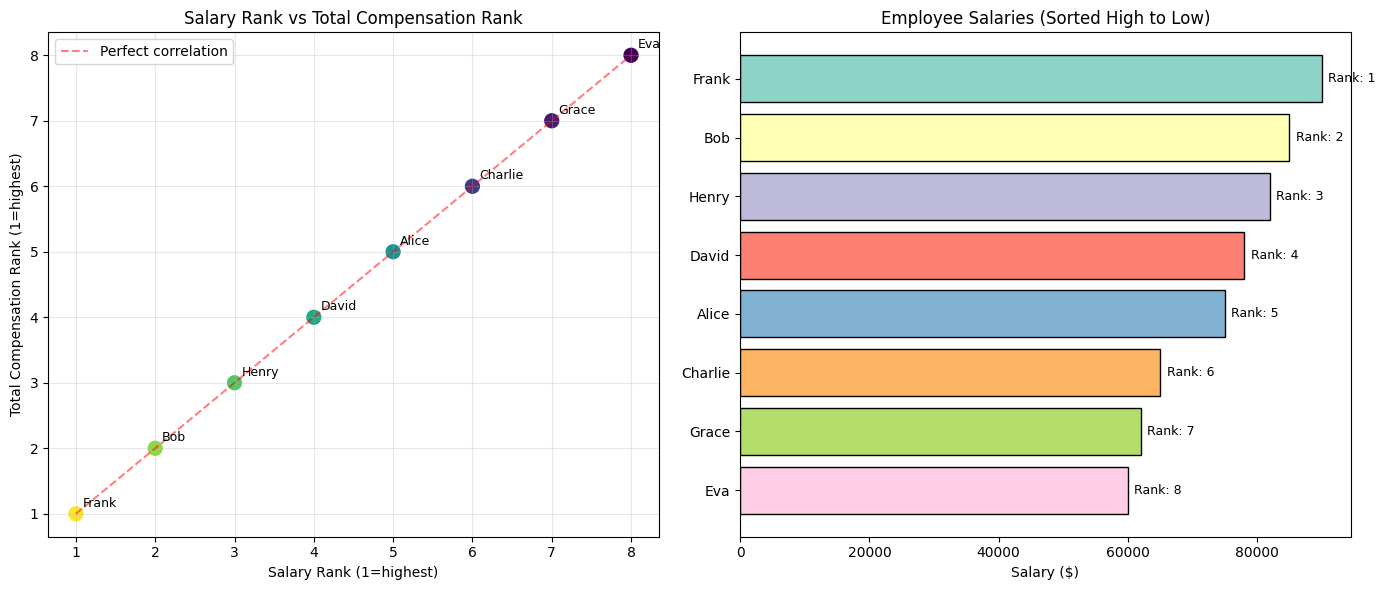

In [16]:
import matplotlib.pyplot as plt

# Create ranking visualization
employee_comp = df.copy()
employee_comp['total_comp'] = employee_comp['salary'] + employee_comp['bonus']
employee_comp['salary_rank'] = employee_comp['salary'].rank(ascending=False)
employee_comp['total_rank'] = employee_comp['total_comp'].rank(ascending=False)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Salary vs Total Compensation Rank
axes[0].scatter(employee_comp['salary_rank'], employee_comp['total_rank'], 
                c=employee_comp['salary'], cmap='viridis', s=100)
axes[0].plot([1, 8], [1, 8], 'r--', alpha=0.5, label='Perfect correlation')
axes[0].set_xlabel('Salary Rank (1=highest)')
axes[0].set_ylabel('Total Compensation Rank (1=highest)')
axes[0].set_title('Salary Rank vs Total Compensation Rank')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add labels for each point
for idx, row in employee_comp.iterrows():
    axes[0].annotate(row['name'], 
                    (row['salary_rank'], row['total_rank']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9)

# Plot 2: Salary distribution with ranks
employee_comp_sorted = employee_comp.sort_values('salary', ascending=False)
colors = plt.cm.Set3(range(len(employee_comp_sorted)))
bars = axes[1].barh(employee_comp_sorted['name'], employee_comp_sorted['salary'], 
                   color=colors, edgecolor='black')
axes[1].set_xlabel('Salary ($)')
axes[1].set_title('Employee Salaries (Sorted High to Low)')
axes[1].invert_yaxis()  # Highest salary at top

# Add rank labels
for i, (bar, rank) in enumerate(zip(bars, range(1, len(employee_comp_sorted)+1))):
    axes[1].text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
                f'Rank: {rank}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 8. Quick Reference Cheat Sheet

In [17]:
print("="*80)
print("PANDAS SORTING & RANKING CHEAT SHEET")
print("="*80)

cheat_sheet = """
BASIC SORTING:
-------------
df.sort_values('col')                    # Ascending (default)
df.sort_values('col', ascending=False)   # Descending
df.sort_values(['col1', 'col2'])         # Multiple columns
df.sort_index()                          # Sort by index

RANKING METHODS:
---------------
method='average'    # Default: average rank for ties (1.5, 1.5, 3)
method='min'        # Lowest rank for ties (1, 1, 3)
method='max'        # Highest rank for ties (1, 2, 3)
method='first'      # Order of appearance for ties (1, 2, 3)
method='dense'      # No gaps between ranks (1, 1, 2)

RANKING FUNCTIONS:
-----------------
df['rank'] = df['col'].rank()                     # Ascending rank
df['rank'] = df['col'].rank(ascending=False)      # Descending rank
df['rank'] = df['col'].rank(pct=True)             # Percentile rank
df['rank'] = df.groupby('group')['col'].rank()    # Rank within groups

TOP/BOTTOM N:
-------------
df.nlargest(5, 'col')      # Top 5 values
df.nsmallest(3, 'col')     # Bottom 3 values
df.nlargest(5, 'col').sort_values('col2')  # Sort top N

CUSTOM SORTING:
--------------
# Custom order
categories = ['High', 'Medium', 'Low']
df['col_cat'] = pd.Categorical(df['col'], categories=categories, ordered=True)
df.sort_values('col_cat')

# Sort by string length
df.sort_values('col', key=lambda x: x.str.len())

NULL HANDLING:
--------------
df.sort_values('col', na_position='first')   # Nulls first
df.sort_values('col', na_position='last')    # Nulls last (default)

PERFORMANCE TIPS:
----------------
1. Use nlargest/nsmallest instead of sort for top/bottom N
2. Convert to categorical for string sorting
3. Use inplace=True to avoid copying: df.sort_values(..., inplace=True)
4. Sort index after operations for faster lookups
5. Use .loc with sorted index for faster selection
"""

print(cheat_sheet)

PANDAS SORTING & RANKING CHEAT SHEET

BASIC SORTING:
-------------
df.sort_values('col')                    # Ascending (default)
df.sort_values('col', ascending=False)   # Descending
df.sort_values(['col1', 'col2'])         # Multiple columns
df.sort_index()                          # Sort by index

RANKING METHODS:
---------------
method='average'    # Default: average rank for ties (1.5, 1.5, 3)
method='min'        # Lowest rank for ties (1, 1, 3)
method='max'        # Highest rank for ties (1, 2, 3)
method='first'      # Order of appearance for ties (1, 2, 3)
method='dense'      # No gaps between ranks (1, 1, 2)

RANKING FUNCTIONS:
-----------------
df['rank'] = df['col'].rank()                     # Ascending rank
df['rank'] = df['col'].rank(ascending=False)      # Descending rank
df['rank'] = df['col'].rank(pct=True)             # Percentile rank
df['rank'] = df.groupby('group')['col'].rank()    # Rank within groups

TOP/BOTTOM N:
-------------
df.nlargest(5, 'col')      # Top 5 